In [112]:
import numpy as np
import matplotlib.pyplot as plt

### On Your Bike!

In [113]:
N = 201
P, m, v_lim = 400, 80, 7
v = np.zeros(N)
v[0] = 0
dt = 1
t = np.arange(0, N, dt)

for i in t[:-1]:
    if v[i] < v_lim:
        v[i + 1] = v[i] + P/(v_lim*m) * dt
    else:
        v[i + 1] = v[i] + P/(m*v[i]) * dt - 0.5*1.204*0.33*v[i]**2/m * dt

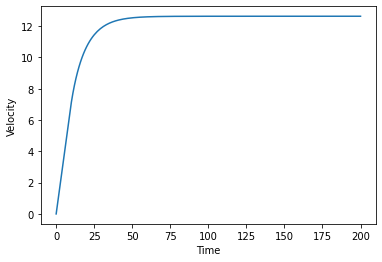

In [114]:
plt.plot(t, v)
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.show()

### Projectile Motion

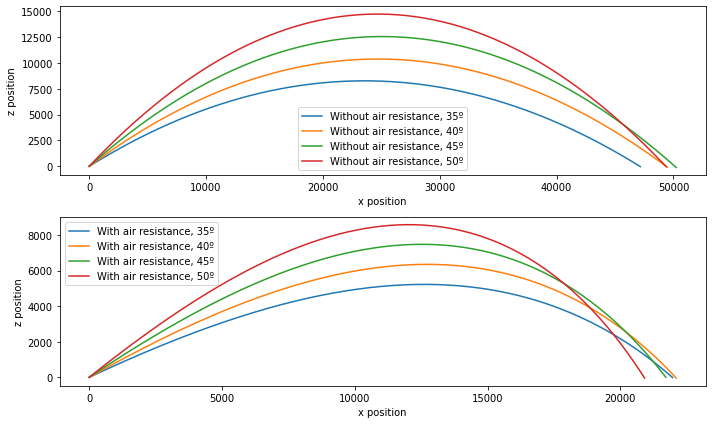

In [115]:
thetas = np.arange(35, 55, 5)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)

for theta in thetas:
    v_in, theta_rad = 700, theta*np.pi/180
    dt = 0.25
    v_x, v_z, x, z = [v_in*np.cos(theta_rad)], [v_in*np.sin(theta_rad)], [0], [0]

    while z[-1]>=0:
        x.append(x[-1] + v_x[-1] * dt)
        z.append(z[-1] + v_z[-1] * dt)
        v_x.append(v_x[-1])
        v_z.append(v_z[-1] - 9.8*dt)
    ax.plot(x, z, label=f"Without air resistance, {theta}º")

for theta in thetas:
    v_in, theta_rad = 700, theta*np.pi/180
    dt = 0.25
    v, v_x, v_z, x, z = [v_in], [v_in*np.cos(theta_rad)], [v_in*np.sin(theta_rad)], [0], [0]
    B = 4e-5

    while z[-1]>=0:
        x.append(x[-1] + v_x[-1] * dt)
        z.append(z[-1] + v_z[-1] * dt)
        v_x.append(v_x[-1] - B*v[-1]*v_x[-1]*dt)
        v_z.append(v_z[-1] - 9.8*dt - B*v[-1]*v_z[-1]*dt)
        v.append(np.sqrt(v_x[-1]**2 + v_z[-1]**2))
    ax1.plot(x, z, label=f"With air resistance, {theta}º")

ax.legend()
ax.set_xlabel("x position")
ax.set_ylabel("z position")
ax1.legend()
ax1.set_xlabel("x position")
ax1.set_ylabel("z position")
plt.tight_layout()
plt.show()

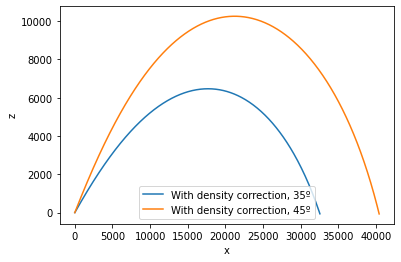

In [116]:
# With density correction:
thetas = [35, 45]
for theta in thetas:
    v_in, theta_rad = 700, theta*np.pi/180
    dt = 0.25
    B, z_0, p_0 = 4e-5, 1e4, 1.204
    p, v, v_x, v_z, x, z = [p_0], [v_in], [v_in*np.cos(theta_rad)], [v_in*np.sin(theta_rad)], [0], [0]

    while z[-1]>=0:
        x.append(x[-1] + v_x[-1] * dt)
        z.append(z[-1] + v_z[-1] * dt)
        v_x.append(v_x[-1] - p[-1]/p_0*B*v[-1]*v_x[-1] * dt)
        v_z.append(v_z[-1] - p[-1]/p_0*9.8*dt - B*v[-1]*v_z[-1] * dt)
        v.append(np.sqrt(v_x[-1]**2 + v_z[-1]**2))
        p.append(p_0 * np.exp(-z[-1]/z_0))
    plt.plot(x, z, label=f"With density correction, {theta}º")

plt.legend()
plt.xlabel("x")
plt.ylabel("z")
plt.show()

### Motion of a spinning ball

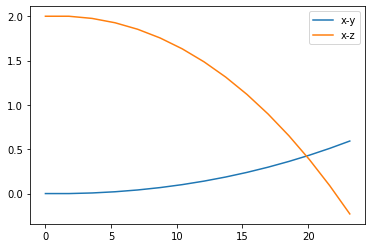

In [117]:
# Using a while loop
def B2(v):
    # [v] = m/s
    return 0.0039 + 0.0058/(1+np.exp((v-35)/5))

def Fmagnus(w, v_x):
    S_0 = 4.1e-4
    return S_0*w*v_x

w, v, v_x, v_y, v_z, x, y, z = [30*2*np.pi], [80*0.44704], [80*0.44704], [0], [0], [0], [0], [2] # m/s
dt = 0.05

while(z[-1] >= 0):
    x.append(x[-1] + v_x[-1] * dt)
    y.append(y[-1] + v_y[-1] * dt)
    z.append(z[-1] + v_z[-1] * dt)
    v_x.append(v_x[-1] - B2(v[-1])*v[-1]*v_x[-1] * dt)
    v_y.append(v_y[-1] + Fmagnus(w[-1], v_x[-1]) * dt)
    v_z.append(v_z[-1] - 9.8 * dt)
    v.append(np.sqrt(v_x[-1]**2 + v_y[-1]**2))

plt.plot(x, y, label="x-y")
plt.plot(x, z, label="x-z")
plt.legend()
plt.show()